In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline
%tensorflow_version 2.x

In [ ]:
# Función para leer las imagenes
def read_img(df):
  data_folder = "/content/drive/MyDrive/DL Tercer Parcial/Data Parcial 3"
  img_list = [plt.imread(os.path.join(data_folder,sub_dir)) for sub_dir in df["File"]]
  return img_list

#Separamos datos para problema 1 y 2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data.csv")
df_P1 = df[df["Kind"] == "Unsupervised"][['File']]
df_P2_Train = df[df["Kind"] == "Train"][['File', 'Fruit']]
df_P2_Test = df[df["Kind"] == "Test"][['File']]
df_P1.to_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data_P1.csv",index=False)
df_P2_Train.to_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data_P2_Train.csv",index=False)
df_P2_Test.to_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data_P2_Test.csv",index=False)

#Problema 1

**En el conjunto de imagenes "Unsupervised" ¿Cuántas frutas distintas están representadas?**

7 frutas distintas

Para obtener este número primero tome las imágenes y cambie sus dimensiones de (100, 100, 3) a (30000), después con ayuda de PCA reduje sus dimensiones a (2), después de esto me apoye en el método de aprendizaje no supervisado K-means y lo cicle 10 veces, donde en cada iteración lo entrene con i clusters, donde i va de 1 a 10 dependiendo del numero del ciclo,  y obtuve su WCSS y lo grafique ya que donde se observará que casi no hay cambio seria el numero optimo de clusters. Una vez graficado considero que 7 es el cluster a partir del cual se observan menos cambios. 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data_P1.csv")
df

,File
0,images_0000.png
1,images_0001.png
2,images_0002.png
3,images_0004.png
4,images_0005.png
...,...
761,images_0993.png
762,images_0994.png
763,images_0995.png
764,images_0998.png


In [ ]:
# Leemos las imagenes y las guardamos en un array de numpy
img_list = np.array(read_img(df))

In [ ]:
# Cambiamos las dimenciones de (766,100,100,3) a (766,30000)
print(img_list.shape)
img_list_re = img_list.reshape(766,100*100*3)
img_list_re.shape

(766, 100, 100, 3)


(766, 30000)

###PCA


In [ ]:
# Normalizamos los datos
scaler=StandardScaler()
# Calculo la media para poder hacer la transformacion
scaler.fit(img_list_re)
# Escalo los datos y los normalizo
X_scaled=scaler.transform(img_list_re)

# Instanciamos objeto PCA en 2 dimenciones y aplicamos
pca=PCA(n_components=2)
# Obtener los componentes principales
pca.fit(X_scaled)
# Convertimos nuestros datos con las nuevas dimensiones de PCA
latent_vector=pca.transform(X_scaled)

###Post


In [ ]:
latent_vector

array([[ 72.64926  , 166.8163   ],
       [ -1.7071781, -77.8976   ],
       [ 11.032728 , -10.748303 ],
       ...,
       [159.63354  ,  46.686207 ],
       [ 37.094917 , -50.791843 ],
       [ 45.79676  ,  45.011993 ]], dtype=float32)

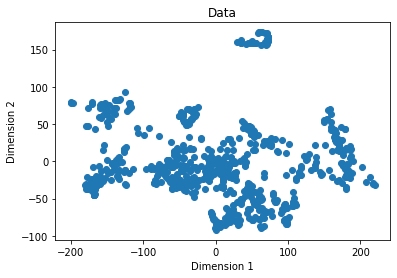

In [ ]:
# Graficamos los valores obtenidos
plt.scatter(latent_vector[:,0],latent_vector[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

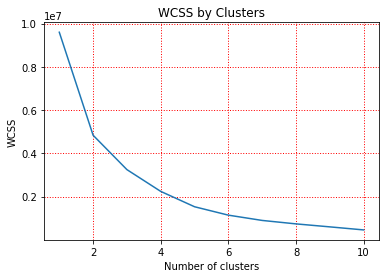

In [ ]:
# Calculamos el WCSS usando de 1 a 10 clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(latent_vector)
  wcss.append(kmeans.inertia_)

# Greficamos los valores de WCSS obtenidos
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

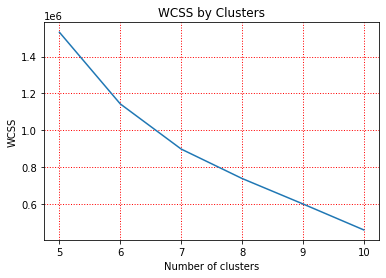

In [ ]:
# Un vistazo mas cerda de los WCSS de clusters de 5 a 10
plt.plot(range(5, 11), wcss[4:])
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

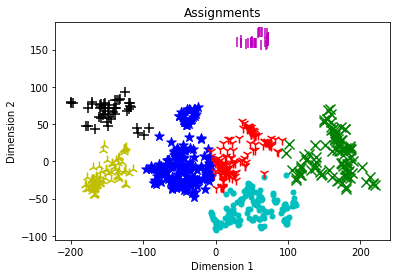

In [ ]:
# Despues de lo visto previamente considero que 7 es el numero optimo de clusters
# Entrenamos un modelo con 7 clusters
model = KMeans(n_clusters=7, init='k-means++', n_init=100, max_iter=1000)
km_clusters = model.fit_predict(latent_vector)

# Funcion para graficar los clusters
def plot_clusters(samples, clusters):
  col_dic = {0:'blue',1:'green',2:"r",3:"y",4:"m",5:"c",6:"K"}
  mrk_dic = {0:'*',1:'x',2:"1",3:"2",4:"|",5:".",6:"+"}
  colors = [col_dic[x] for x in clusters]
  markers = [mrk_dic[x] for x in clusters]
  for sample in range(len(clusters)):
      plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.title('Assignments')
  plt.show()

# Graficamos los clusters
plot_clusters(latent_vector, km_clusters)

#Problema 2

##Train

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data_P2_Train.csv")
df

,File,Fruit
0,images_0003.png,Huckleberry
1,images_0007.png,Orange
2,images_0013.png,Strawberry
3,images_0016.png,Strawberry
4,images_0018.png,Huckleberry
...,...,...
182,images_0757.png,Huckleberry
183,images_0758.png,Strawberry
184,images_0766.png,Strawberry
185,images_0768.png,Strawberry


In [ ]:
# Lo transformamos la categoria a un vector con valores binarios
y = pd.get_dummies(df["Fruit"]).values

In [ ]:
# Leemos las imagenes
img_list = read_img(df)

In [ ]:
# Inicializamos el modelo
model = Sequential([
 Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (100,100,3)),
 Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
 MaxPooling2D((2, 2)),
 Conv2D(28, (3, 3), activation = 'relu', padding = 'same'),
 Conv2D(28, (3, 3), activation = 'relu', padding = 'same'),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(32, activation = 'relu'),
 Dense(64, activation='relu'),
 Dense(32, activation='relu'),
 Dense(3, activation = 'softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 28)        8092      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0

In [ ]:
# Transformamos los datos a un array de numpy
y = np.array(y)
img_list = np.array(img_list)
y.shape, img_list.shape

((187, 3), (187, 100, 100, 3))

In [ ]:
# Entrenamos el modelo
history = model.fit(img_list, y, batch_size=62, epochs=10)

Epoch 1/10
4/4 [==============================] - 33s 71ms/step - loss: 1.0769 - accuracy: 0.2768
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 0.8690 - accuracy: 0.6185
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 0.4932 - accuracy: 0.8358
Epoch 4/10
4/4 [==============================] - 0s 25ms/step - loss: 0.1177 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: 3.0420e-05 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 22ms/step - loss: 1.7302e-05 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 22ms/step - loss: 1.3742e-05 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 21ms/step - loss: 4.1873e-04 - accuracy: 1.0000


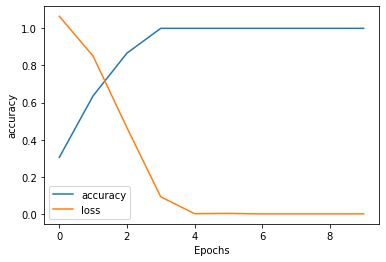

In [ ]:
# Graficamos el accuracy y el loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "loss"])
plt.show()

##Test

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data_P2_Test.csv")
df

,File
0,images_0783.png
1,images_0789.png
2,images_0793.png
3,images_0796.png
4,images_0798.png
5,images_0799.png
6,images_0804.png
7,images_0806.png
8,images_0813.png
9,images_0823.png


In [ ]:
# Leemos las imagenes a predecir y las guardamos en un array de numpy
img_test = np.array(read_img(df))

In [ ]:
# Hacamos la predicción
predictions = model.predict(img_test)
# Tomamos el indice mas grande para asignar la categoria
df["predictions"] = [np.argmax(x) for x in predictions]
# Inicializamos un diccionario con la categoria corresponfiente a cada indice
frutas = {
    0:"Huckleberry",
    1:"Orange",
    2:"Strawberry"
}
# Clasificamos las imagenes
df["Fruit"] = [frutas[x] for x in df["predictions"]]
df

,File,predictions,Fruit
0,images_0783.png,2,Strawberry
1,images_0789.png,2,Strawberry
2,images_0793.png,0,Huckleberry
3,images_0796.png,0,Huckleberry
4,images_0798.png,1,Orange
5,images_0799.png,0,Huckleberry
6,images_0804.png,1,Orange
7,images_0806.png,2,Strawberry
8,images_0813.png,0,Huckleberry
9,images_0823.png,1,Orange


In [ ]:
# Guardamos el dataframe
df.to_csv("/content/drive/MyDrive/DL Tercer Parcial/fruit_data_1807660.csv")